# Random Forest
Random forest is model that is using different decision trees that are build on random splitting and copying data

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data['feature_names']].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("prediction:", rf.predict([X_test[0]]))
print("true value:", y_test[0])
print("random forest accuracy:", rf.score(X_test, y_test))

prediction: [1]
true value: 1
random forest accuracy: 0.972027972027972


#### Compare to decision tree

In [3]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision tree score:", dt.score(X_test, y_test))
print("Random forest score:", rf.score(X_test, y_test))

Decision tree score: 0.9090909090909091
Random forest score: 0.972027972027972


#### RandomForestClassifier parameters
To constructor
- Same parameters like decision tree:
 - <b>max_depth</b>
 - <b>max_depth</b>
 - <b>min_samples_leaf</b>
- New parameters
 - <b>n_estimators</b> The number of trees <i>(default 10)</i>
 - <b>max_features</b> the number of features to consider at each split <i>(default square root of p,
 where p is the number of features)</i>

In [4]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=123)
param_grid = {'n_estimators': [10, 25, 50, 75, 100]}
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 25}


In [5]:
n_estimators = range(1, 101)
param_grid = {'n_estimators': n_estimators}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
scores = gs.cv_results_['mean_test_score']
print(scores)

[0.91386431 0.91558764 0.93150132 0.95081509 0.9402422  0.95609377
 0.95432386 0.95784816 0.95964912 0.95433939 0.95960255 0.95783263
 0.95607825 0.9490607  0.95432386 0.95786369 0.95607825 0.95079957
 0.95784816 0.95783263 0.95786369 0.95435491 0.95961807 0.95609377
 0.95607825 0.95955597 0.96135693 0.95609377 0.9596336  0.95784816
 0.96138798 0.96314237 0.95784816 0.96137246 0.96489676 0.95784816
 0.96312684 0.96662009 0.95784816 0.95256948 0.95960255 0.95430834
 0.96663562 0.96135693 0.95783263 0.95784816 0.96312684 0.96312684
 0.96137246 0.95783263 0.96312684 0.95960255 0.96135693 0.95784816
 0.95607825 0.96312684 0.95960255 0.97014439 0.95783263 0.95960255
 0.95960255 0.95784816 0.95960255 0.95784816 0.95609377 0.95255395
 0.96312684 0.95607825 0.9648657  0.95960255 0.96488123 0.96134141
 0.96837448 0.96485018 0.96489676 0.96134141 0.95609377 0.96488123
 0.96312684 0.96662009 0.95960255 0.95786369 0.95960255 0.96662009
 0.96312684 0.96135693 0.96311132 0.96312684 0.95958702 0.9631

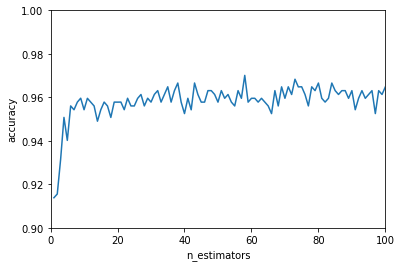

In [6]:
import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()

At this graph we see that about 10 trees the accuracy increase

#### optimal random forest

In [7]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y)

RandomForestClassifier(n_estimators=10)

### Finding best features

In [8]:
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)
ft_imp = pd.Series(rf.feature_importances_, index=cancer_data.feature_names).sort_values(ascending=False)
ft_imp.head(10)

worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
dtype: float64

In [9]:
rf.score(X_test, y_test)

0.965034965034965

In [10]:
worst_cols = [col for col in df.columns if 'worst' in col]
print(worst_cols)

['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [11]:
X_worst = df[worst_cols]
X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state=101)
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.972027972027972


#### Comparing Random forrest to Logistic regression when data cannot be split by line

In [12]:
from sklearn.datasets import make_circles
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

kf = KFold(n_splits=5, shuffle=True, random_state=1)
lr_scores = []
rf_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    lr_scores.append(lr.score(X_test, y_test))
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))
print("LR accuracy:", np.mean(lr_scores))
print("RF accuracy:", np.mean(rf_scores))

LR accuracy: 0.36
RF accuracy: 0.86


In classification, Random forest and Logistic regression are often best to benchmark, without tuning
Random forest
- Random forrest is build with many not very good Decision trees model, but when averaged, create an excellent  model,
but random forest are bad in interpretability, which isn't important in most cases
- Random forrest takes long on build and is also slower than Decision tree, but have great performance and there is
much computational power